## **Eduardo Carrasco Vidal** <img src="img/logo.png" align="right" style="width: 120px;"/>

**Magister en Inteligencia Artificial, Universidad Adolfo Ibáñez.**

**Profesor:** Juan Bekios.
**Curso:** Aprendizaje Profundo (Deep Learning).

Enlace al repositorio del alumno en [GitHub](https://github.com/educarrascov/MIA_DeepLearning) _@educarrascov_

![Python](https://img.shields.io/badge/python-%2314354C.svg) 



## I. Tarea:

1. Entrenar otro clasificador, con redes neuronales utilizando diferentes **hiperpárametros** (candidad de capas ocultas, neuronas por capa, tasa de aprendizaje, funciones de activación y optimización) pruebe al menos tres combinaciones. Utilice los resultados de la validación para seleccionar el mejor modelo.
En el link puede encontrar más información [Link](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier).
2. Seleccione el mejor modelo y entrénelo con los datos del conjunto de entrenamiento y validación (use todo el conjunto de datos).
3. Segmente la imagen propuesta, pintando de **blanco** los lugares donde existan **pixeles de color piel** y **negro** en aquellos **pixeles distintos a piel**, utilizando el modelo de redes neuronales entrenado en el punto anterior (2).

## A. Lectura y distribución de datos:

Para esto, utilizamos una base de datos disponible en la UCI ("Skin Segmentation Data Set"), objeto conformar una base de datos y posteriormente identificar la cantidad de variables por clase identificadas como _Piel_ y _No Piel_.



Counter({2: 194198, 1: 50859})


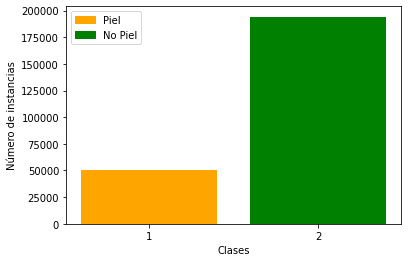

In [10]:
import pandas as pd

# Leer los datos
df = pd.read_csv('Skin_NonSkin.txt', sep='\t', 
                 header=None, names=['R', 'G', 'B', 'Class'])
# Graficar variables
import matplotlib.patches as mpatches

import collections
import matplotlib.pyplot as plt

counts = collections.Counter(df['Class'])
print(counts)
plt.bar(range(len(counts)), list(counts.values()), tick_label=list(counts.keys()), 
        color=['orange', 'green'], label=('piel', 'no piel'))
plt.xlabel('Clases')
plt.ylabel('Número de instancias')

red_patch = mpatches.Patch(color='orange', label='Piel')
blue_patch = mpatches.Patch(color='green', label='No Piel')
plt.legend(handles=[red_patch, blue_patch])

## B. Seleccionar datos de entrenamiento y validación:

* Convierto los datos a numpy y normalizo las imágenes
* Separo el conjunto de entrenamiento (80%) y validación (20%).


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
from operator import itemgetter

# Selecciono atributos de entrada (Normalizo la imagen entre 0 y 1)
data_rgb = df[['R', 'G', 'B']].to_numpy()/255

# Selecciono las etiquetas de salida
labels = list(df['Class'])

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
#test size simboliza el 20%, random state (num aleatorio), si es cero genera siempre
# el mismo valor cuando se elige aleatoriamente.
sss.get_n_splits(data_rgb, labels)

# Separo los datos
it = iter(sss.split(data_rgb, labels))
train_index, test_index = next(it)

X_train = data_rgb[train_index, :]
y_train = itemgetter(*train_index)(labels)

X_valid = data_rgb[test_index, :]
y_valid = itemgetter(*test_index)(labels)

## C. Preparar conjunto de entrenamiento y validación:

* Para poder configurar los **hiperparámetros** utilizaremos el conjunto de datos separado para el entremamiento.
* El 20% restante se utilizará para estimar la eficiencia del clasificador. Utilizando como métrica la tasa de acierto.

### 1. Modelo propuesto Nº 1:

Los parámetros involucrados en este modelo corresponden a:

* **Candidad de capas ocultas** = 2.
* **Función de Activación** = Relu.
* **Máxima cantidad de iteraciones** = 50.
* **Solver** = adam.
* **Tasa de Aprendizaje** = Constante.

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier

accs_train1 = []
accs_test1 = []
losses_train1 = []
losses_test1 = []
skf = StratifiedKFold(n_splits=5)
numero = 1
for train, test in skf.split(X_train, y_train):
    # train y test son indices
    data_train1 = X_train[train, :]
    label_train1 = itemgetter(*train)(y_train)
    data_test1 = X_train[test, :]
    label_test1 = itemgetter(*test)(y_train) 
    
    # Entrenamiento
    mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', max_iter=50, alpha=1e-4,
                        solver='adam', batch_size=200, verbose=0, random_state=1,
                        learning_rate='constant', learning_rate_init=.1)  
    
    mlp.fit(data_train1, label_train1)
    acc_train1 = mlp.score(data_train1, label_train1)
    acc_test1 = mlp.score(data_test1, label_test1)
    accs_train1.append(acc_train1)
    accs_test1.append(acc_test1)
    print(f'Fold{numero}')
    numero += 1
    print('Tasa de acierto entrenamiento, modelo 1: %f' % acc_train1)
    print('Tasa de acierto pruebas, modelo 1: %f' % acc_test1)
    print('='*40)
    
    losses_train1.append(mlp.loss_curve_)
    loss_1 = mlp.loss_curve_
    print(loss_1)

Fold1
Tasa de acierto entrenamiento, modelo 1: 0.792458
Tasa de acierto pruebas, modelo 1: 0.792471
[0.5126144889203862, 0.5112982760120506, 0.511161567791031, 0.5113845826147334, 0.5112037066322949, 0.5113798761922683, 0.5112907069783987, 0.5113079482522971, 0.5112547850227138, 0.5113624420439083, 0.5112565587927462, 0.5111928912635432, 0.5113138661846071, 0.5114275184709557]
Fold2
Tasa de acierto entrenamiento, modelo 1: 0.792458
Tasa de acierto pruebas, modelo 1: 0.792471
[0.5126291191102075, 0.5111503371109266, 0.5112224240616443, 0.5113794807884865, 0.5113328373742151, 0.5113092952753631, 0.5112888496163481, 0.5112619868720318, 0.5112887045035375, 0.5113137330347871, 0.511257013576692, 0.5112712004596507, 0.5114722183101293]
Fold3
Tasa de acierto entrenamiento, modelo 1: 0.792458
Tasa de acierto pruebas, modelo 1: 0.792471
[0.5127564700729991, 0.5112176936221875, 0.5112737005890776, 0.5112968585961266, 0.5113000218118461, 0.5113567500937007, 0.5112983073561609, 0.511354415080241, 

### 2. Modelo Propuesto Nº 2:

Los parámetros involucrados en este modelo corresponden a:

* **Candidad de capas ocultas** = 3.
* **Función de Activación** = Logistica.
* **Máxima cantidad de iteraciones** = 100.
* **Solver** = sgd.
* **Tasa de Aprendizaje** = Constante.

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier

accs_train2 = []
accs_test2 = []
losses_train2 = []
losses_test2 = []
skf = StratifiedKFold(n_splits=5)
numero = 1
for train, test in skf.split(X_train, y_train):
    # train y test son indices
    data_train2 = X_train[train, :]
    label_train2 = itemgetter(*train)(y_train)
    data_test2 = X_train[test, :]
    label_test2 = itemgetter(*test)(y_train) 
    
    # Entrenamiento
    mlp = MLPClassifier(hidden_layer_sizes=(3,), activation='logistic', max_iter=100, alpha=1e-4,
                        solver='sgd', batch_size=200, verbose=0, random_state=1,
                        learning_rate='constant', learning_rate_init=.1)  
    
    mlp.fit(data_train2, label_train2)
    acc_train2 = mlp.score(data_train2, label_train2)
    acc_test2 = mlp.score(data_test2, label_test2)
    accs_train2.append(acc_train2)
    accs_test2.append(acc_test2)
    print(f'Fold{numero}')
    numero += 1
    print('Tasa de acierto entrenamiento, modelo 2: %f' % acc_train2)
    print('Tasa de acierto pruebas, modelo 2: %f' % acc_test2)
    print('='*40)
    
    losses_train2.append(mlp.loss_curve_)
    loss_2 = mlp.loss_curve_
    print(loss_2)

Fold1
Tasa de acierto entrenamiento, modelo 2: 0.997998
Tasa de acierto pruebas, modelo 2: 0.998240
[0.2607189849638604, 0.148947357875092, 0.11627687707526342, 0.09947477102721773, 0.09005799670487744, 0.08273834978172105, 0.07746235354448651, 0.07488211490714788, 0.07315331705945072, 0.07180943754965785, 0.0705174879972753, 0.0692789354427564, 0.06809093326689743, 0.06644177787972155, 0.06378811528944194, 0.05982689237453301, 0.05467334579423395, 0.04887508133545296, 0.042883122898496925, 0.037460444864239904, 0.03301649409027018, 0.029700577760940712, 0.02720136222294242, 0.025304347161042035, 0.023748223175065822, 0.022486217578001483, 0.021429720014959592, 0.020382483286935545, 0.019608020861842927, 0.0188443016034657, 0.018221939677637352, 0.017620841000875735, 0.01707458052862527, 0.016558798460366286, 0.016076198407179162, 0.015690692347772178, 0.015316479138950838, 0.01493825523279837, 0.014650736266829155, 0.014367855693499205, 0.01408082213547248, 0.013838254374825942, 0.013

### 3. Modelo Propuesto Nº 3:

Los parámetros involucrados en este modelo corresponden a:

* **Candidad de capas ocultas** = 5.
* **Función de Activación** = TanH.
* **Máxima cantidad de iteraciones** = 100.
* **Solver** = adam.
* **Tasa de Aprendizaje** = Constante.

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier

accs_train3 = []
accs_test3 = []
losses_train3 = []
losses_test3 = []
skf = StratifiedKFold(n_splits=5)
numero = 1
for train, test in skf.split(X_train, y_train):
    # train y test son indices
    data_train3 = X_train[train, :]
    label_train3 = itemgetter(*train)(y_train)
    data_test3 = X_train[test, :]
    label_test3 = itemgetter(*test)(y_train) 
    
    # Entrenamiento
    mlp = MLPClassifier(hidden_layer_sizes=(5,), activation='tanh', max_iter=100, alpha=1e-4,
                        solver='adam', batch_size=200, verbose=0, random_state=1,
                        learning_rate='constant', learning_rate_init=.1)  
    
    mlp.fit(data_train3, label_train3)
    acc_train3 = mlp.score(data_train3, label_train3)
    acc_test3 = mlp.score(data_test3, label_test3)
    accs_train3.append(acc_train3)
    accs_test3.append(acc_test3)
    print(f'Fold{numero}')
    numero += 1
    print('Tasa de acierto entrenamiento, modelo 3: %f' % acc_train3)
    print('Tasa de acierto pruebas, modelo 3: %f' % acc_test3)
    print('='*40)
    
    losses_train3.append(mlp.loss_curve_)
    loss_3 = mlp.loss_curve_
    print(loss_3)

Fold1
Tasa de acierto entrenamiento, modelo 3: 0.997105
Tasa de acierto pruebas, modelo 3: 0.997195
[0.0828220102644458, 0.014281387432533094, 0.012096878950147497, 0.010673264335608917, 0.010489083859234154, 0.010218446764068937, 0.010099440977382758, 0.010313915258640149, 0.009894326974846577, 0.01123273303773043, 0.009965233802386328, 0.010286045722322692, 0.009726209831400654, 0.010022162161005472, 0.010413411426567843, 0.01017913711090666, 0.009748002018088531, 0.009505363433769391, 0.009952886566393294, 0.009661487143570912, 0.009393209989101543, 0.009836703608066365, 0.009695870184720895, 0.009951419638976647, 0.009706101306592491, 0.00951121084821119, 0.009970304451151069, 0.009739578008581483, 0.010034097217510122, 0.009595445923774332, 0.009797356852839039, 0.009658736541118597]
Fold2
Tasa de acierto entrenamiento, modelo 3: 0.995275
Tasa de acierto pruebas, modelo 3: 0.995231
[0.08873367552702285, 0.014461131763115467, 0.01205176527035054, 0.010069116700342945, 0.01093270617

## D. Visualizar la tasa de acierto por _fold_:

### 1. Modelo Propuesto Nº 1:

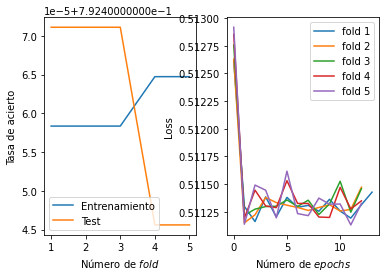

In [15]:
plt.subplot(1,2,1)
plt.plot(range(1,6), accs_train1, label='Entrenamiento')
plt.plot(range(1,6), accs_test1, label='Test')
plt.xlabel('Número de $fold$')
plt.ylabel('Tasa de acierto')
plt.legend()

plt.subplot(1,2,2)
for i, f in enumerate(losses_train1):
    plt.plot(f, label=f'fold {i+1}')

plt.xlabel('Número de $epochs$')
plt.ylabel('Loss')
plt.legend()

Se efectuó la simulación del modelo Nº 1, obteniendo una tasa variable de acierto y un grado de convergencia no determinante en los epochs.

### 2. Modelo Propuesto Nº 2:

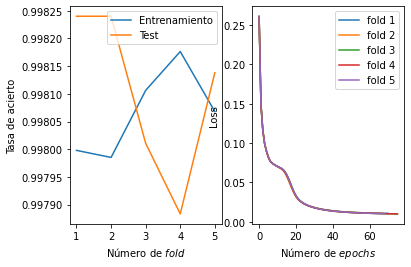

In [16]:
plt.subplot(1,2,1)
plt.plot(range(1,6), accs_train2, label='Entrenamiento')
plt.plot(range(1,6), accs_test2, label='Test')
plt.xlabel('Número de $fold$')
plt.ylabel('Tasa de acierto')
plt.legend()

plt.subplot(1,2,2)
for i, f in enumerate(losses_train2):
    plt.plot(f, label=f'fold {i+1}')

plt.xlabel('Número de $epochs$')
plt.ylabel('Loss')
plt.legend()

Se efectuó una simulación bajo los parámetros determinados en el modelo Nº 2, determinando un adecuado grado de acierto pero la convergencia en los epochs es determinada cercana al 20 y estable en el 40, por lo cual, no es el más eficiente.

### 3. Modelo Propuesto Nº 3:

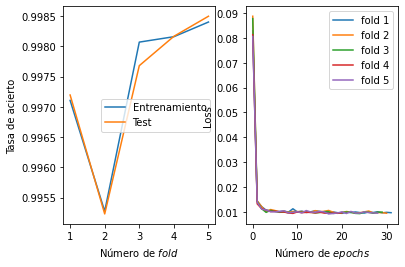

In [17]:
plt.subplot(1,2,1)
plt.plot(range(1,6), accs_train3, label='Entrenamiento')
plt.plot(range(1,6), accs_test3, label='Test')
plt.xlabel('Número de $fold$')
plt.ylabel('Tasa de acierto')
plt.legend()

plt.subplot(1,2,2)
for i, f in enumerate(losses_train3):
    plt.plot(f, label=f'fold {i+1}')

plt.xlabel('Número de $epochs$')
plt.ylabel('Loss')
plt.legend()

Con respecto a este modelo, se determinó una alto tasa de acierto y con respecto a la convergencia, esta se produce rápidamente con un número de epoch mucho menor al resto

## E. Validación:

* Utilizamos el conjunto de entrenamiento para entrenar el modelo de la red, con los **hiperparámetros** encontrados.
* Utilizamos el modelo entrenado con el conjunto de entrenamiento

Seleccionamos el modelo Nº 3, debido a que permite converger con la menor cantidad de epochs y representa la mayor tasa de acierto.

In [18]:
from sklearn.metrics import classification_report

# Utilizamos todos los datos del conjunto de entrenamiento
mlp = MLPClassifier(hidden_layer_sizes=(5,), activation='tanh', max_iter=100, alpha=1e-4,
                        solver='sgd', batch_size=200, verbose=10, random_state=1,
                        learning_rate='constant', learning_rate_init=.1)  
    
# Entrenamos el modelo con el conjunto de entrenamiento
mlp.fit(X_train, y_train)

# Estimamos las etiquetas del conjunto de validación
y_pred = mlp.predict(X_valid)


print(classification_report(y_valid, y_pred, target_names=['Piel', 'No Piel']))

Iteration 1, loss = 0.17179212
Iteration 2, loss = 0.07806155
Iteration 3, loss = 0.03721374
Iteration 4, loss = 0.02330731
Iteration 5, loss = 0.01764213
Iteration 6, loss = 0.01468181
Iteration 7, loss = 0.01286148
Iteration 8, loss = 0.01172862
Iteration 9, loss = 0.01100822
Iteration 10, loss = 0.01042338
Iteration 11, loss = 0.00999158
Iteration 12, loss = 0.00968898
Iteration 13, loss = 0.00940699
Iteration 14, loss = 0.00927246
Iteration 15, loss = 0.00905579
Iteration 16, loss = 0.00894868
Iteration 17, loss = 0.00889519
Iteration 18, loss = 0.00877027
Iteration 19, loss = 0.00865548
Iteration 20, loss = 0.00857039
Iteration 21, loss = 0.00845586
Iteration 22, loss = 0.00838886
Iteration 23, loss = 0.00837070
Iteration 24, loss = 0.00830358
Iteration 25, loss = 0.00828428
Iteration 26, loss = 0.00825106
Iteration 27, loss = 0.00820640
Iteration 28, loss = 0.00823426
Iteration 29, loss = 0.00813236
Iteration 30, loss = 0.00817311
Iteration 31, loss = 0.00815649
Iteration 32, los

## F. Gráfico de la función de pérdida para el entrenamiento:

Text(0.5, 1.0, 'Función de pérdida ($loss$) vs el número de iteraciones')

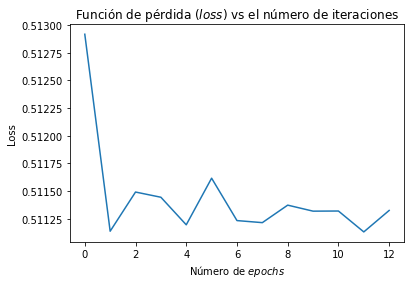

In [19]:
plt.plot(loss_1)
plt.xlabel('Número de $epochs$')
plt.ylabel('Loss')
plt.title('Función de pérdida ($loss$) vs el número de iteraciones')

Text(0.5, 1.0, 'Función de pérdida ($loss$) vs el número de iteraciones')

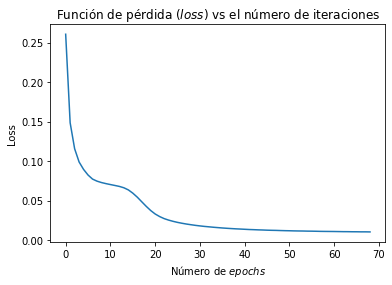

In [20]:
plt.plot(loss_2)
plt.xlabel('Número de $epochs$')
plt.ylabel('Loss')
plt.title('Función de pérdida ($loss$) vs el número de iteraciones')

Text(0.5, 1.0, 'Función de pérdida ($loss$) vs el número de iteraciones')

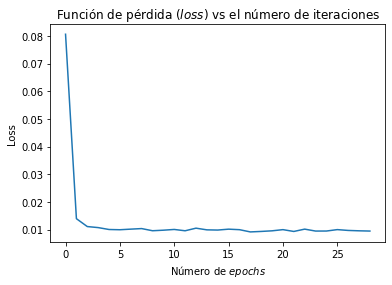

In [21]:
plt.plot(loss_3)
plt.xlabel('Número de $epochs$')
plt.ylabel('Loss')
plt.title('Función de pérdida ($loss$) vs el número de iteraciones')

## E. Aplicación a Imagen:

(318, 525, 3)
[[138 138 138 138 138 138 138 138 138 138]
 [138 138 138 138 138 138 138 138 138 138]
 [138 138 138 138 138 138 138 138 138 138]
 [138 138 138 138 138 138 138 138 139 139]
 [139 139 139 139 139 139 139 139 139 139]
 [139 139 139 139 139 139 139 139 141 141]
 [139 139 139 139 139 139 139 139 141 141]
 [139 139 139 139 139 139 139 139 141 141]
 [144 144 143 143 143 143 142 142 142 142]
 [144 144 144 143 143 143 143 142 142 143]]


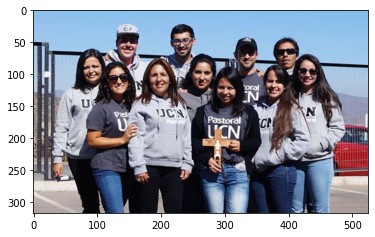

In [22]:
import numpy as np
import pandas as pd

image = plt.imread('piel-ucn.jpeg')
imgplot = plt.imshow(image)

print(image.shape)

print(image[0:10,0:10,0])

# Normalizo la imagen
image = image/255

(4032, 3024, 3)
[[216 215 213 210 209 207 205 202 196 192]
 [217 216 215 213 210 209 206 204 198 193]
 [218 218 216 215 212 211 208 206 200 196]
 [219 219 219 216 214 213 210 208 202 198]
 [220 220 220 218 216 214 212 209 204 200]
 [221 222 222 220 218 216 214 211 206 203]
 [222 224 223 221 220 218 215 213 208 205]
 [223 224 224 222 221 219 216 214 210 207]
 [223 223 223 224 222 220 217 216 211 209]
 [223 224 224 223 222 220 218 217 213 211]]


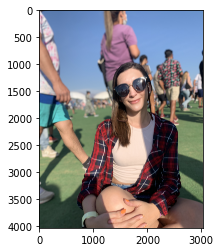

In [23]:
import numpy as np
import pandas as pd

image2 = plt.imread('imagen_piel.jpg')
imgplot = plt.imshow(image2)

print(image2.shape)

print(image2[0:10,0:10,0])

# Normalizo la imagen
image2 = image2/255

(318, 525)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


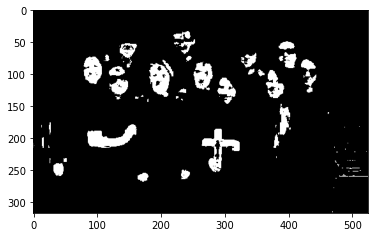

In [14]:
image_piel = np.zeros((image.shape[0], image.shape[1]))
for fil in range(image.shape[0]):
  for col in range(image.shape[1]):
    r = image[fil, col, 2]
    g = image[fil, col, 1]
    b = image[fil, col, 0]

    class_pred = mlp.predict([[r, g, b]])

    if class_pred[0] == 1:
      image_piel[fil, col] = 1.

print(image_piel.shape)
print(image_piel)
# Normalizo la imagen
image_piel = image_piel/255
plt.imshow(image_piel, cmap='gray')